# Dataset

In this Speed Dating Experiment, we are going to focus on what infuences love at first sight. 
The event happened between 2002 and 2004 and gathered more than 500 people. 

In [36]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy
import seaborn as sns

In [37]:
data = pd.read_csv('/content/Speed Dating Data.csv', encoding='unicode_escape')
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [38]:
data.shape

(8378, 195)

In [39]:
number_of_participants = len(data['iid'].unique())
number_of_matches = len(data.loc[data['match'] == 1])
print(number_of_participants, "people participated at the Speed Dating Experiment.\nDuring the experiment, On the",len(data),"dates organised,", 
      number_of_matches, "matches happened, which is", round((number_of_matches / len(data))*100,2), "% of the dates.")



551 people participated at the Speed Dating Experiment.
During the experiment, On the 8378 dates organised, 1380 matches happened, which is 16.47 % of the dates.


##Let's start by doing some data wrangling...

We need to rename our columns and change numeric fields in categorial fields

In [40]:
data = data.rename(columns={
    "int_corr":"interest correlation",
    "age_o": "partner age",
    "race_o": "partner race", 
    "pf_o_att": "partner importance attra",
    "pf_o_sin": "partner importance sinc",
    "pf_o_int": "partner importance int",
    "pf_o_fun": "partner importance fun",
    "pf_o_amb": "partner importance ambitious",
    "pf_o_sha": "partner importance share int",
    "attr_o": "Rate by partner attra",
    "sinc_o": "Rate by partner sinc",
    "intel_o": "Rate by partner intel",
    "fun_o": "Rate by partner fun",
    "amb_o": "Rate by partner amb",

})

study_replacement = {
    1: "Law", 
    2: "Math",
    3: "Social Science",
    4: "Medical Science, Pharmaceuticals, and Bio Tech ",
    5: "Engineering",
    6: "English/Creative Writing/ Journalism ",
    7: "History/Religion/Philosophy",
    8: "Business/Econ/Finance ",
    9: "Education, Academia",
    10: "Biological Sciences/Chemistry/Physics",
    11: "Social Work",
    12: "Undergrad/undecided",
    13: "Political Science/International Affairs",
    14: "Film",
    15: "Fine Arts/Arts Administration",
    16: "Languages",
    17: "Architecture",
    18: "Other"}

race_replacement = {
    1: "Black/African American",
    2: "European/Caucasian-American",
    3: "Latino/Hispanic American",
    4: "Asian/Pacific Islander/Asian-American",
    5: "Native American",
    6: "Other"
}

goal_replacement = {
    1: "Seemed like a fun night out",
    2: "To meet new people",
    3: "To get a date",
    4: "Looking for a serious relationship",
    5: "To say I did it",
    6: "Other"
}

date_replacement = {
    1: "Several times a week",
    2: "Twice a week",
    3: "Once a week",
    4: "Twice a month",
    5: "Once a month",
    6: "Several times a year",
    7: "Almost never"
}

go_out_replacement = {
  1:"Several times a week",
	2:"Twice a week",
	3:"Once a week"	,
  4:"Twice a month",
	5:"Once a month",
	6:"Several times a year",
	7:"Almost never"
}

career_replacement = {
    1: "Lawyer", 
    2: "Academic/Research", 
    3: "Psychologist", 
    4: "Doctor/Medicine", 
    5: "Engineer", 
    6: "Creative Arts/Entertainment", 
    7: "Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin",
    8: "Real Estate",
    9: "International/Humanitarian Affairs",
    10: "Undecided",
    11:"Social Work",
    12:"Speech Pathology",
    13: "Politics",
    14:"Pro sports/Athletics",
    15: "Other",
    16:"Journalism",
    17:"Architecture"
}

length_replacement = {
  1: "Too little",
	2 :"Too much",
	3 :"Just Right"
}

num_date_replacement = {
  1: "Too little",
	2 :"Too much",
	3 :"Just Right"
}

data['go_out'].replace( go_out_replacement, inplace=True)
data['length'].replace(length_replacement, inplace=True)
data['race'].replace(race_replacement, inplace=True)
data['field_cd'].replace(study_replacement, inplace=True)
data['career_c'].replace(career_replacement, inplace=True)
data['date'].replace(date_replacement, inplace=True)
data['goal'].replace(goal_replacement, inplace=True)
data['numdat_2'].replace( num_date_replacement, inplace=True )
data['partner race'].replace( race_replacement, inplace=True)

data['gender'] = data["gender"].apply(lambda x: 'Female' if x == 0 else 'Male')
data['match'] = data["match"].apply(lambda x: 'No match' if x == 0 else 'Match')


In [41]:
number_of_participants = len(data['iid'].unique())
number_of_matches = len(data.loc[data['match'] == 'Match'])
gender_repartition = data.groupby("gender")['iid'].count()
ethnic_repartition = data.groupby("race")['iid'].count()
percentage_match_per_ethnic = data.loc[data['match'] == 1].groupby("race")['iid'].count() / data.groupby("race")['iid'].count()

print(number_of_participants, "people participated at the Speed Dating Experiment.\nDuring the experiment, On the",len(data),"dates organised,", 
      number_of_matches, "matches happened, which is", round((number_of_matches / len(data))*100,2), "% of the dates.")

551 people participated at the Speed Dating Experiment.
During the experiment, On the 8378 dates organised, 1380 matches happened, which is 16.47 % of the dates.


We can note that the columns with a high percentage of missing values are those related to the information about the day after the event, or 3-4 weeks after event. It probably means that most people did not meet each other afterwards. 

In [42]:
(data.isnull().sum() / len(data)).sort_values(ascending = False)

num_in_3    0.920267
numdat_3    0.821437
expnum      0.785152
sinc7_2     0.766651
amb7_2      0.766651
              ...   
wave        0.000000
condtn      0.000000
idg         0.000000
gender      0.000000
dec         0.000000
Length: 195, dtype: float64

We can note that the columns with a high percentage of missing values are those related to the information about the day after the event, or 3-4 weeks after event. It probably means that most people did not meet each other afterwards. Thus, 80% did not respond to the question "How many of your matches have you been on a date with so far?"

#Data Exploratory

### Who are the participants and why do they take part at the event?

In [43]:
data_unique_iid = data.drop_duplicates(subset='iid')

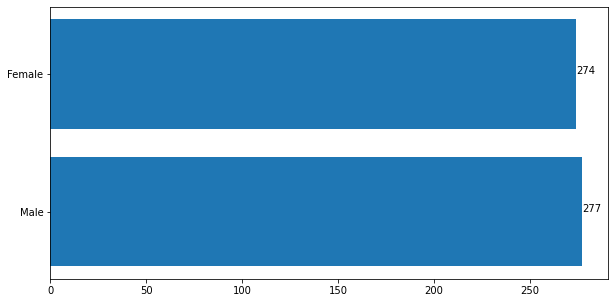

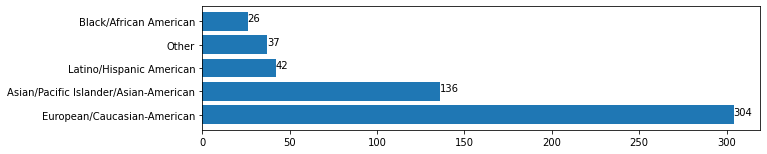

In [44]:
plt.figure(figsize=( 10, 5))
plt.subplot(1,1,1)
plt.barh(y = data_unique_iid['gender'].value_counts().index,
        width = data_unique_iid['gender'].value_counts().values)
for i in range(0,2):
  plt.text(y = data_unique_iid['gender'].value_counts().index[i],
         x = data_unique_iid['gender'].value_counts().values[i],
          s = data_unique_iid['gender'].value_counts().values[i])

plt.show()

print('\n')

plt.figure(figsize=( 10, 5))
plt.subplot(2,1,2)
plt.barh(y = data_unique_iid['race'].value_counts().index,
        width = data_unique_iid['race'].value_counts().values)
for i in range(0,5):
  plt.text(y = data_unique_iid['race'].value_counts().index[i],
         x = data_unique_iid['race'].value_counts().values[i],
          s = data_unique_iid['race'].value_counts().values[i])

plt.show()

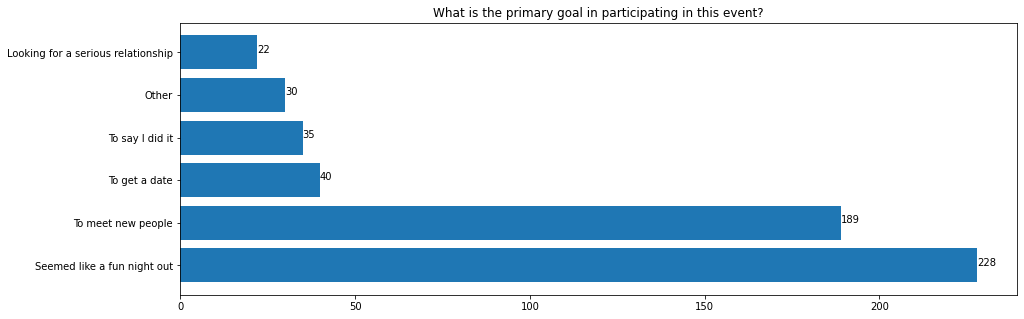

In [45]:
from matplotlib import text
plt.figure(figsize=(15,5))
plt.barh(y = data_unique_iid['goal'].value_counts().index, 
         width = data_unique_iid['goal'].value_counts().values
         )
plt.title("What is the primary goal in participating in this event?")
for i in range(0,6):
  plt.text(y = data_unique_iid['goal'].value_counts().index[i],
         x = data_unique_iid['goal'].value_counts().values[i],
          s = data_unique_iid['goal'].value_counts().values[i])

In [46]:
data['goal'].value_counts().sort_values().index

Index(['Looking for a serious relationship', 'Other', 'To say I did it',
       'To get a date', 'To meet new people', 'Seemed like a fun night out'],
      dtype='object')

In [47]:
data_unique_iid.loc[data['match'] == 'Match']['go_out'].value_counts()

Several times a week    38
Twice a week            26
Once a week             17
Twice a month            1
Name: go_out, dtype: int64

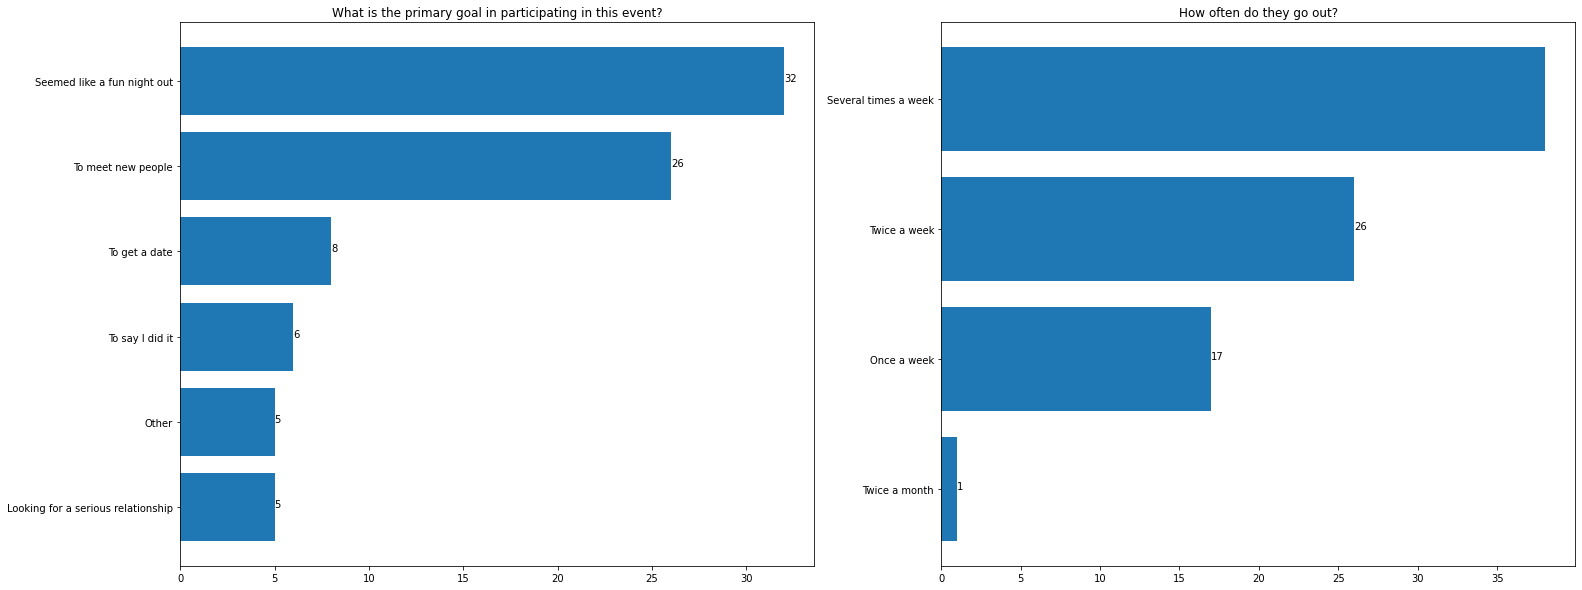

In [48]:
plt.figure(figsize=( 25, 10))
plt.subplot(1,2,1)
plt.barh(y = data_unique_iid.loc[data['match'] == 'Match']['goal'].value_counts().sort_values().index, 
         width = data_unique_iid.loc[data['match'] == 'Match']['goal'].value_counts().sort_values().values,
         )
plt.title("What is the primary goal in participating in this event?")
for i in range(0,6):
  plt.text(y = data_unique_iid.loc[data['match'] == 'Match']['goal'].value_counts().sort_values().index[i],
           x = data_unique_iid.loc[data['match'] == 'Match']['goal'].value_counts().sort_values().values[i],
           s = data_unique_iid.loc[data['match'] == 'Match']['goal'].value_counts().sort_values().values[i])


plt.subplot(1,2,2)
plt.barh(y = data_unique_iid.loc[data['match'] == 'Match']['go_out'].value_counts().sort_values().index, 
         width = data_unique_iid.loc[data['match'] == 'Match']['go_out'].value_counts().sort_values().values
         )
plt.title("How often do they go out?")
for i in range(0,3):
  plt.text(y = data_unique_iid.loc[data['match'] == 'Match']['go_out'].value_counts().sort_values().index[i],
           x = data_unique_iid.loc[data['match'] == 'Match']['go_out'].value_counts().sort_values().values[i],
           s = data_unique_iid.loc[data['match'] == 'Match']['go_out'].value_counts().sort_values().values[i])

plt.show()





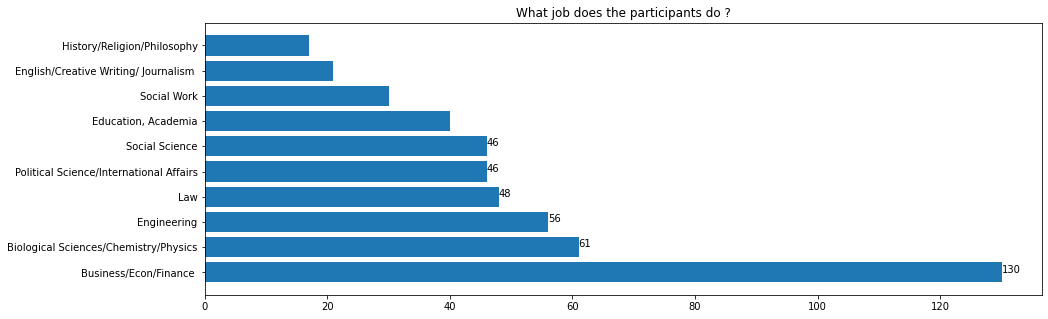

In [49]:
plt.figure(figsize=(15,5))

plt.barh(y = data_unique_iid['field_cd'].value_counts()[0:10].index,
         width = data_unique_iid['field_cd'].value_counts()[0:10].values)

for i in range(0,6):
  plt.text(y = data_unique_iid['field_cd'].value_counts()[0:10].index[i],
           x = data_unique_iid['field_cd'].value_counts()[0:10].values[i],
           s = data_unique_iid['field_cd'].value_counts()[0:10].values[i])
plt.title('What job does the participants do ?')
plt.show()

It seems like most participants wanted to try the Speed Dating experiment and were not looking for a serious relationship. They essentially work in economics, finance or more scientific fields such as Physics, bio and engineering

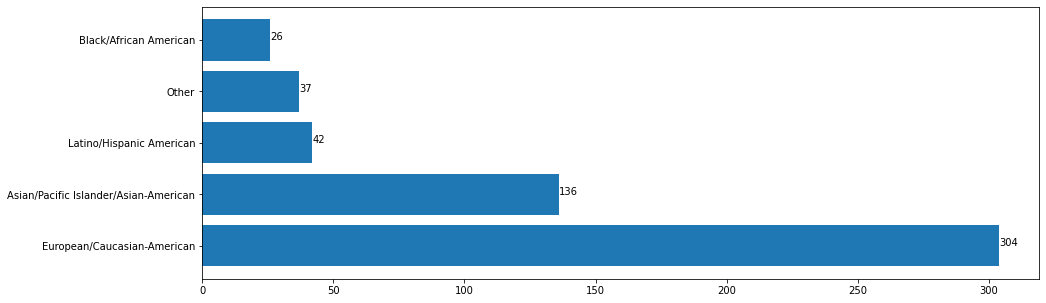

In [50]:
plt.figure(figsize=(15,5))
plt.barh(y = data_unique_iid['race'].value_counts().index, 
         width = data_unique_iid['race'].value_counts().values)

for i in range(0,5):

  plt.text(y =data_unique_iid['race'].value_counts().index[i], 
           x =data_unique_iid['race'].value_counts().values[i], 
           s=data_unique_iid['race'].value_counts().values[i])

The European/Caucasian-American portion represents more than 55% of the participants.
Black/African American represents the smallest portion of the participants with less than 5%. 

### Expectations

Participants were asked to give their feelings on how happy do they expect to be with the people they will meet on a scale 1-10.

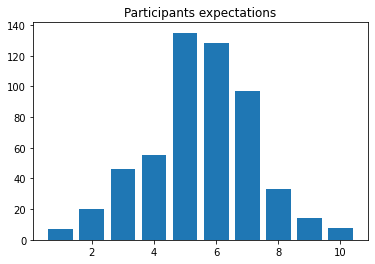

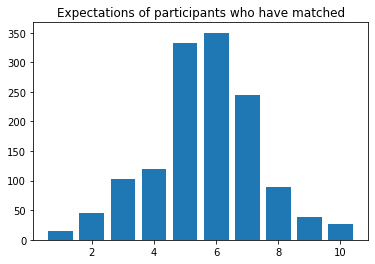

In [51]:
plt.bar(x = data_unique_iid['exphappy'].value_counts().index,
        height = data_unique_iid['exphappy'].value_counts().values)
plt.title('Participants expectations')
plt.show()

print('\n')

plt.bar(x = data.loc[data['match'] == 'Match']['exphappy'].value_counts().index,
        height = data.loc[data['match'] == 'Match']['exphappy'].value_counts().values)
plt.title('Expectations of participants who have matched')
plt.show()

Overall, participants had pretty good expecations about the Speed Dating event. Most of them gave 5-6 out of 10 on how happy they expected to be. 

# Analysis

### Before and during the event

We are going to analyze more precisely the event, the different waves and what influences the participants in their choice. 
We will respond to the following questions:
- What are the least desirable attributes in a male partner? Does this differ for female partners?
- How important do people think attractiveness is in potential mate selection vs. its real impact?
- Did religion and racial backgroup play a important role?

To answer these questions, we will analyze the points given by the participants on several attributes. They had to distribute 100 points on the following attributs: 
- Ambition
- Attractiveness
- Intelligence
- Fun
- Shared interests
- Sincerity 


Let's start with the participants look for in the opposite sex. 

In [52]:
data.drop_duplicates(subset='iid').pivot_table(index = 'gender', values=['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
                                                                     'amb1_1', 'shar1_1'])

,amb1_1,attr1_1,fun1_1,intel1_1,shar1_1,sinc1_1
gender,,,,,,
Female,12.818476,18.020372,17.299108,20.971004,12.697836,18.22223
Male,8.823956,27.248800,17.600839,19.387418,10.982271,16.37960


In [53]:
attributes = ['ambition','attractiveness', 'fun', 'intelligence', 'shared interest', 'sincerity' ]
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r = [12.818476,	18.020372,	17.299108,	20.971004, 12.697836	,18.22223],
    theta = attributes,
    fill='toself',
    name = 'What females look for'
))

fig.add_trace(go.Scatterpolar(
    r = [8.823956,	27.248800,	17.600839,	19.387418,	10.982271,	16.37960],
    theta = attributes,
    fill='toself',
    name = 'What males look for'
))

fig.show()

The expectations are very different between men and women. It looks like women have distribute a balanced number of points on several attributes while men, although they gave points on several attributs, have given more points on attractiveness. 

On average, the least desirable attribute in a male partner is shared interests. For a female partner, ambition is the least desirable attribute. 


Now, we look at the vision by the opposite sex on what men and women look for. The question "What do you think the opposite sex looks for in a date?" was asked.

In [54]:
data.drop_duplicates(subset='iid').pivot_table(index = 'gender', values=['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1',
                                                                     'amb2_1', 'shar2_1'] )

,amb2_1,attr2_1,fun2_1,intel2_1,shar2_1,sinc2_1
gender,,,,,,
Female,9.114387,35.600632,19.051636,12.478439,12.626766,11.284535
Male,14.357482,25.012218,18.015164,16.331164,11.164343,15.126255


In [55]:
attributs = ['ambition','attractiveness', 'fun', 'intelligence', 'shared interest', 'sincerity' ]
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r = [9.114387,	35.600632,	19.051636,	12.478439,	12.626766,	11.284535],
    theta = attributs,
    fill='toself',
    name = "Men's expectation according to women"
))

fig.add_trace(go.Scatterpolar(
    r = [14.357482,	25.012218,	18.015164,	16.331164,	11.164343,	15.126255],
    theta = attributs,
    fill='toself',
    name = "Women's expectations according to men"
))

fig.show()

By looking at the shape of the graph, one thing comes in mind; men think women look for a man with several different attributes. Although more points were given to attractiveness, points on ambition, sincerity and intelligence are almost equivalent. 

Contrariwise, women think men are only looking for attractiveness and fun. This can imply that men are looking for serious relationship because not a lot of point were given on the attribute sincerity, intelligence or shared interests. 

It would be interesting to compare women's expectations according to men versus what women really look for and vice versa

In [56]:
attributs = ['ambition','attractiveness', 'fun', 'intelligence', 'shared interest', 'sincerity' ]
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r = [14.357482,	25.012218,	18.015164,	16.331164,	11.164343,	15.126255],
    theta = attributs,
    fill='toself',
    name = "Women's expectation according to men"
))

fig.add_trace(go.Scatterpolar(
    r = [12.818476,	18.020372,	17.299108,	20.971004,	12.697836,	18.22223],
    theta = attributs,
    fill='toself',
    name = "What women really look for"
))

fig.show()

attributs = ['ambition','attractiveness', 'fun', 'intelligence', 'shared interest', 'sincerity' ]
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r = [9.114387,	35.600632,	19.051636,	12.478439,	12.626766,	11.284535],
    theta = attributs,
    fill='toself',
    name = "Men's expectation according to women"
))

fig.add_trace(go.Scatterpolar(
    r = [8.823956,	27.248800,	17.600839,	19.387418,	10.982271,	16.37960],
    theta = attributs,
    fill='toself',
    name = "What men really look for"
))

fig.show()

According to the results, both men and women have underestimated the intelligence attribute. There is respectively a 5 and 7pts differential between how men and women think the opposite sex rate intelligence and the reality. Moreover, it appears that intelligence is the best attributes among all attributes according to women from the Speed Dating event. What we can say is intelligence can be a pretty good strenght. When discussing with a person and finding out how smart he/she is, it truly can influence the decision.

Then, attractiveness has been overestimated by both sex. There is a 7pts gap between what men think about women's expectations on attractiveness and the reality, and there is an 8pts gap between what women think about men's expectations on attractiveness and the reality. This is without a doubt a big topic in relationship


For the next part, we are going to analyze the actual importance of the previous attributes in the decisions of matching or not. Although, some people will appear multiple times in the dataset because they have met many people, we consider every date as a different and unique experience. Attractiveness, fun, intelligence can be felt differently depending on the people we meet. Therefore, the points will most likely be distributed differently for every date.

In [57]:
print(data['attr7_2'].isnull().sum() / len(data))
print(data['sinc7_2'].isnull().sum() / len(data))
print(data['attr7_2'].isnull().sum() / len(data))
print(data['intel7_2'].isnull().sum() / len(data))


0.7631893053234662
0.7666507519694438
0.7631893053234662
0.7631893053234662


76% of the dates did not provided this information, the next result will have a serious margin error. 

In [58]:
# Importance of attributes in the decision to match or not at half way through the Speed Date event
from numpy.core.numeric import NaN
data.loc[data['attr7_2'] != NaN].loc[data['sinc7_2'] != NaN].loc[data['intel7_2'] != NaN].loc[data['fun7_2'] != NaN].loc[data['shar7_2'] != NaN].loc[data['amb7_2'] != NaN].pivot_table(
    index = 'gender', values=['attr7_2', 'sinc7_2','intel7_2','fun7_2','shar7_2','amb7_2'])

,amb7_2,attr7_2,fun7_2,intel7_2,shar7_2,sinc7_2
gender,,,,,,
Female,8.132937,28.630964,18.426485,15.580331,13.779942,15.263889
Male,6.386484,37.314525,19.342738,14.986416,10.394931,11.684266


In [59]:
# What they are looking for in the opposite sex vs what most influence their choices in matching 

attributs = ['ambition','attractiveness', 'fun', 'intelligence', 'shared interest', 'sincerity' ]
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r = [12.818476,	18.020372,	17.299108,	20.971004,	12.697836,	18.22223],
    theta = attributs,
    fill='toself',
    name = 'What women look for in the opposite sex'
))

fig.add_trace(go.Scatterpolar(
    r = [8.132937,	28.630964,	18.426485,	15.580331,	13.779942,	15.263889],
    theta = attributs,
    fill='toself',
    name = 'What most influence women in their choice'
))

fig.show()

fig2 = go.Figure()

fig2.add_trace(go.Scatterpolar(
    r = [8.823956,	27.248800,	17.600839,	19.387418,	10.982271,	16.37960],
    theta = attributs,
    fill='toself',
    name = 'What men look for in the opposite sex'
))

fig2.add_trace(go.Scatterpolar(
    r = [6.386484,	37.314525,	19.342738,	14.986416,	10.394931,	11.684266],
    theta = attributs,
    fill='toself',
    name = 'What most influence men in their choice'
))

fig2.show()

Very interesting results!

It looks like both men and women have underestimated attractiveness; in fact it was clearly the most importance attribute in their final decision and they both gave 10 extra points compared to what they initially gave.The same remark goes for intelligence with a 5 points differential.

What we can say is both sex have an ideal man/woman in their mind with a particular profile that can match their own personality. However, when it comes to take a decision, they most likely rely on what they can see, their first impressions and how attract they are by the partner.  




###The next day

The day following the Speed Dating event, participants were asked to respond to the same questions. Let's see how answers have evolved...

In [60]:
# What you look for in the opposite sex (day after event)

data.drop_duplicates(subset='iid').pivot_table(index = 'gender', values=['attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2',
                                                                     'amb1_2', 'shar1_2'] )

,amb1_2,attr1_2,fun1_2,intel1_2,shar1_2,sinc1_2
gender,,,,,,
Female,11.446849,21.862996,17.489874,19.118109,13.942521,16.576639
Male,8.535385,30.126721,17.736356,16.751457,11.512024,15.204534


In [61]:
attributs = ['ambition','attractiveness', 'fun', 'intelligence', 'shared interest', 'sincerity' ]
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r = [12.818476,	18.020372,	17.299108,	20.971004,	12.697836,	18.22223],
    theta = attributs,
    fill='toself',
    name = 'What women look for in the opposite sex (before event)'
))

fig.add_trace(go.Scatterpolar(
    r = [11.446849,	21.862996,	17.489874,	19.118109,	13.942521,	16.576639],
    theta = attributs,
    fill='toself',
    name = 'What women look for in the opposite sex (the next day)'
))

fig.show()

fig2 = go.Figure()

fig2.add_trace(go.Scatterpolar(
    r = [8.823956,	27.248800,	17.600839,	19.387418,	10.982271,	16.37960],
    theta = attributs,
    fill='toself',
    name = 'What men look for in the opposite sex (before event)'
))

fig2.add_trace(go.Scatterpolar(
    r = [8.535385,	30.126721,	17.736356,	16.751457,	11.512024,	15.204534],
    theta = attributs,
    fill='toself',
    name = 'What men look for in the opposite sex (the next day)'
))

fig2.show()

In [62]:
data.drop_duplicates(subset='iid').pivot_table(index = 'gender', values=['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
                                                                     'amb1_1', 'shar1_1'])

,amb1_1,attr1_1,fun1_1,intel1_1,shar1_1,sinc1_1
gender,,,,,,
Female,12.818476,18.020372,17.299108,20.971004,12.697836,18.22223
Male,8.823956,27.248800,17.600839,19.387418,10.982271,16.37960


Overall, participants kept the same opinion on what they look for in the opposite sex apart for attractiveness. In fact, it looks like both men and women were more demanding on this attribute the day after the event. Is it because they were disappointed by the people they met? Did they realize they are actually a bit more "superficial" than they thought? 

### Did religion and race play an important role in the final decision? 

Let's see how important religion and race is for the participants.

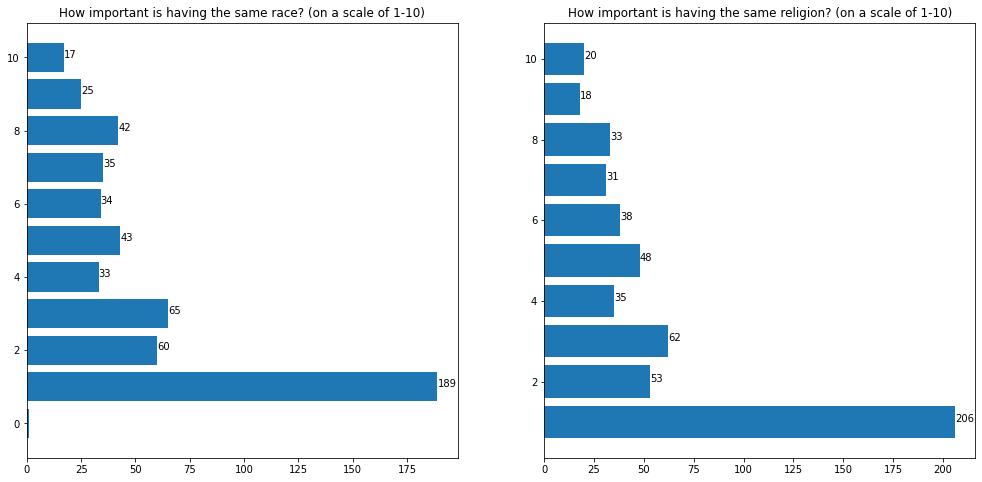

In [63]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.barh(y = data_unique_iid['imprace'].value_counts().index, width = data_unique_iid['imprace'].value_counts().values)

for i in range(0,10):
  plt.text(y = data_unique_iid['imprace'].value_counts().index[i], 
           x = data_unique_iid['imprace'].value_counts().values[i],
           s = data_unique_iid['imprace'].value_counts().values[i])
plt.title('How important is having the same race? (on a scale of 1-10)')


plt.subplot(1,2,2)
plt.barh(y = data_unique_iid['imprelig'].value_counts().index, width = data_unique_iid['imprelig'].value_counts().values)
for i in range(0,10):
  plt.text(y = data_unique_iid['imprelig'].value_counts().index[i], 
           x = data_unique_iid['imprelig'].value_counts().values[i],
           s = data_unique_iid['imprelig'].value_counts().values[i])
plt.title('How important is having the same religion? (on a scale of 1-10)')
plt.show()

The large majority of participants do not value religion or race as important for a date. More than 50% gave less a 3 out of 10 for these 2 criterias.

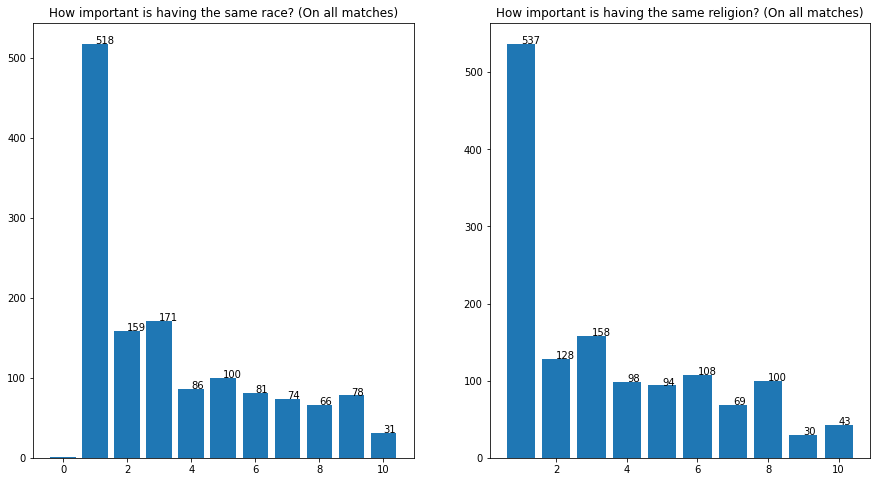

In [64]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.bar(x = data.loc[data['match'] == 'Match']['imprace'].value_counts().index, height = data.loc[data['match'] == 'Match']['imprace'].value_counts().values)

for i in range(0,10):
  plt.text(x = data.loc[data['match'] == 'Match']['imprace'].value_counts().index[i], 
           y = data.loc[data['match'] == 'Match']['imprace'].value_counts().values[i],
           s = data.loc[data['match'] == 'Match']['imprace'].value_counts().values[i])
plt.title('How important is having the same race? (On all matches)')


plt.subplot(1,2,2)
plt.bar(x = data.loc[data['match'] == 'Match']['imprelig'].value_counts().index, height = data.loc[data['match'] == 'Match']['imprelig'].value_counts().values)
for i in range(0,10):
  plt.text(x = data.loc[data['match'] == 'Match']['imprelig'].value_counts().index[i], 
           y = data.loc[data['match'] == 'Match']['imprelig'].value_counts().values[i],
           s = data.loc[data['match'] == 'Match']['imprelig'].value_counts().values[i])
plt.title('How important is having the same religion? (On all matches)')
plt.show()

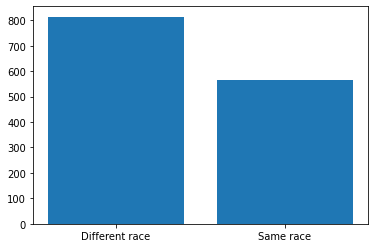

In [65]:
data['samerace'] = data['samerace'].apply(lambda x : 'Same race' if x == 1 else 'Different race')
plt.bar(x = data.loc[data['match'] == 'Match']['samerace'].value_counts().index,
        height = data.loc[data['match'] == 'Match']['samerace'].value_counts().values)
plt.show()

Although people did not give important on having the same race, more than 42% of the matches were between people from the same race. It can be related to physical preference and not necessarly because of a race preference, but it would be interesting to go deeper...

# Conclusion

First of all, a subject as complexe as love and human interactions in general could not be fully understood and dissected with such an mathematical approach. There are so many subtleties that cannot be measured and analyzed with data. For the needs of the experiment, it had to be simplified.  
However, it is still interesting because it allows to see some tendencies, especially about what guides men and women in their choices.

Then, like it was easily predictible, men and women do not have the same expectations from one another. At first, they do not put their priorities on the same attributes because they are not sensitive to the same things. We saw that their priorities evolve with time. They go from putting the focus on 1-2 attributs to focusing on a more complete person, with more attributes. 

Finally, The experiment has shown the stereotypes men and women have on one another. In fact, there is a gap between the reality and what the expectations they think the opposite sex has. It goes without saying that these stereotypes create a lot of issues and contribute largely to the struggle people face when looking for love.
